# *`03_Gradient Descent and it's Variants`*

## What is Gradient Descent?
Gradient descent is a mathematical optimization algorithm that is often used to train machine learning models and neural networks. It is a first-order iterative algorithm for finding a local minimum of a differentiable function.

The idea is to take repeated steps in the opposite direction of the gradient of the function at the current point, because this is the direction of the steepest descent.

* It is an optimization technique to which you provide a differentiable function.
* The function should be differentiable at every point.

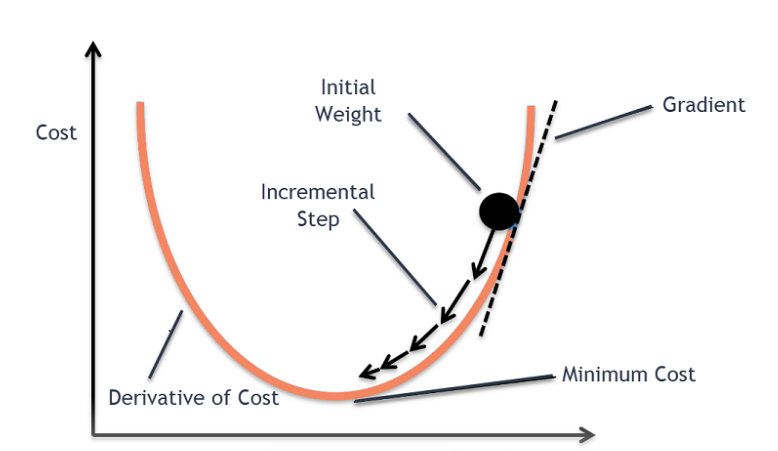

* image source [check here](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

\
\
**INTUITION:**

Let's try to get an intuition from the eyes of Linear Regression. Consider the data below:

\
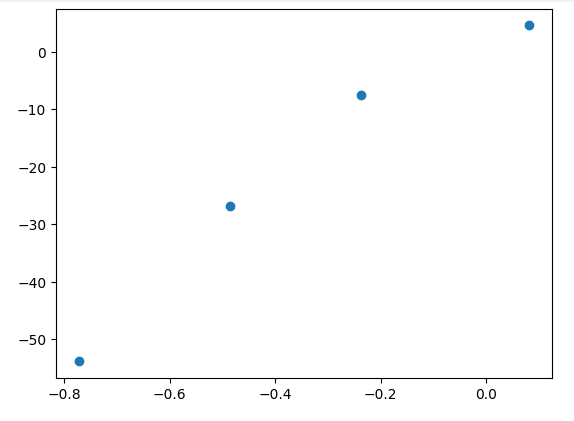

We are trying to fit a line which minimizes the loss for us. i.e. we aim to minimize the distance between $y_{true}$  and  $y_{hat}$ where, $y_{hat}$ is given by:

$y_{hat_i} = m x_i + b$              ...... (1)   

and the loss function used in linear regression is Mean Squarred error stated as follows:

$$
L = \sum_{i=1}^{n} (y_i - y_{hat_i})^2
$$
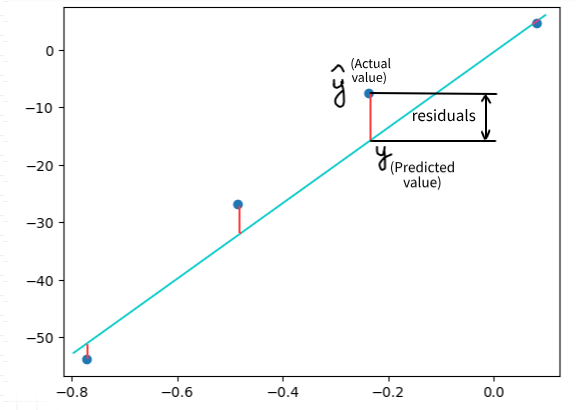


\
\
If we put eq $(1)$ in our loss function it becomes a function of $m$ and $b$:
$$
L_{(m,b)} = \sum_{i=1}^{n} (y_i - m * x_i + b)^2
$$

You have a function with two tuning knobs $m$ and $b$.
* If you change $m$, the line rotates in clockwise or anticlockwise direction.
* If you change $b$, the line moves up and down.

To simplify the discussion, let's say for our data we have $m$ = 3.8. Then $L$ just remains a function of $b$.
$$
L_{(b)} = \sum_{i=1}^{4} (y_i - 3.8 * x_i + b)^2
$$

You have the direction of your line $m$ and now want to find the height of the line. Thats basically the minima of the loss function:

\
\
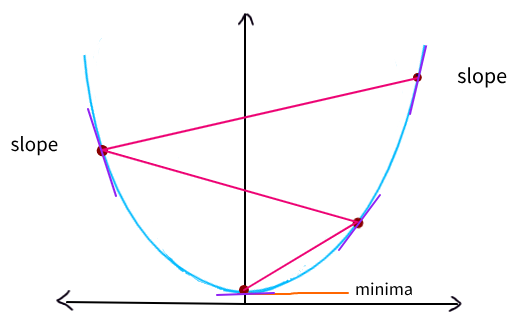

\


1. You start at a random point $b$ is initialized randomly.

2. The way to moves further is that the algorithm calculates the slope at each point. You draw a tangent at each point and the direction of the slope will tell the algorithm whether to move forward or backward.
> If the slope is **`-ve`**: Then move forward. Increment the value of $b$ by slope.\
> If the slope is **`+ve`**: Then go backward. Decrement the value of $b$ by slope.


Formulated as:

$$
b_{new} = b_{old} - slope
$$

The change caused in $b$ due to above formula is quite drastic thats because a higher value of slope will lead to a higher step size. We would want to move ahead gradually therefore, we introduce a learning factor $\eta$.

$$
b_{new} = b_{old} - \eta * slope
$$

You keep updating the $b$ until convergence.

**When to stop ?**

If $b_{new} - b_{old}$ is same or very small like ~ 0.0001. It means you have converged to the solution.

\

**Algorithm:**

Let's write the algorithm:

1. Initialize random value for $m$ and $b$.

  $m = 1$ and $b = 0$

2. Set the number of epochs and the learning rate

  $epcochs = 100$ and $lr = 0.001$

3. for $i$ in $epochs$:

>>    $b = b - \eta * slope$
\
>>    $m = m - \eta * slope$


* $change_{(slope_b)}$ for calculating $b$ by keeping $m$ constant is :

$$
change_{(slope_b)} = \sum_{i=1}^{n} -2 (y_i - m * x_i - b)
$$

* $change_{(slope_m)}$ for calculating $m$ by keeping $b$ constant is :

$$
change_{(slope_m)} = \sum_{i=1}^{n} -2 (y_i - m * x_i - b) x_i
$$

Let's write the code for the algorithm.

In [1]:
import random
class GradientDescentRegressor:
    # Initialize the values of slope and intercept randomly
    def __init__(self,learning_rate,epochs):
        self.slope_ = random.randint(-100, 100)
        self.intercept_ = random.randint(-100, 100)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost = 0

    def fit(self, x, y):
      # Just for viisualization purpose we are storing all the values in a list
      coef_values = []
      intercept_values = []
      costs = []

        # Calculate change in slope using gradient descent for both slope and intercept
      for _ in range(self.epochs):

        change_in_slope_b = -2 * np.sum(y - self.slope_ * x.ravel() - self.intercept_) # based on the formula above update the values of b
        change_in_slope_m = -2 * np.sum((y - self.slope_ * x.ravel() - self.intercept_) * x.ravel()) # based on the formula above update the values of m
        self.cost = self.cost + (y - self.slope_ * x.ravel() - self.intercept_) ** 2 # cost = (y - mxi - b)**2

        self.slope_ = self.slope_ - (self.learning_rate * change_in_slope_m)
        self.intercept_ = self.intercept_ - (self.learning_rate * change_in_slope_b)

        coef_values.append(self.slope_)
        intercept_values.append(self.intercept_)
        costs.append(self.cost)

      return coef_values, intercept_values, costs

    def predict(self, x):
        return self.slope_ * x + self.intercept_

In [2]:
# Generate regression data
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

X,y = make_regression(n_samples=100,
                      n_features=1,
                      n_informative=1,
                      n_targets=1,
                      noise=20,
                      random_state=0)

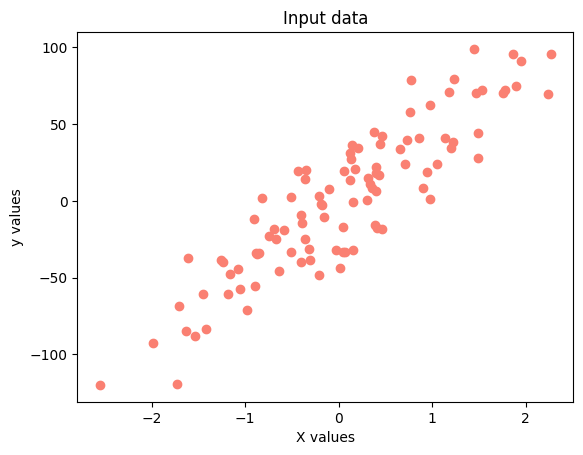

In [3]:
# plot the values
plt.scatter(X, y, c = 'salmon')
plt.title("Input data")
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [4]:
# Split the data into training and testing splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

### Sklearn: Linear Regression

In [5]:
# Instantiate an object of scikit learn regression class
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

# Fit the model
lr.fit(X_train,y_train)

# Make some predictions
y_preds_lr = lr.predict(X_test)

# Print the r2 score, along with slope and intercept values
print(f"R2 Score for sklearn LR: {r2_score(y_test, y_preds_lr)}")
print(f"Beta coef's for sklearn LR: {lr.coef_}")
print(f"Intercept for sklearn LR: {lr.intercept_}")

R2 Score for sklearn LR: 0.8159456277045894
Beta coef's for sklearn LR: [42.90415989]
Intercept for sklearn LR: -1.18677824866961


### Custom Gradient Descent Regression class

In [6]:
# Instantiate an object of Gradient descent regression class
GDR = GradientDescentRegressor(0.001,50)

# Fit the model
coef, intercept, cost = GDR.fit(X_train,y_train)

# Make some predictions
y_preds_gdr = GDR.predict(X_test)

# Print the r2 score, along with slope and intercept values
print(f"R2 Score for Custom GDR: {r2_score(y_test, y_preds_gdr)}")
print(f"Beta coef's for Custom GDR: {GDR.slope_}")
print(f"Intercept for Custom GDR: {GDR.intercept_}")

R2 Score for Custom GDR: 0.8159092709995032
Beta coef's for Custom GDR: 42.89347665155947
Intercept for Custom GDR: -1.16821722973326


In [7]:
len(cost), len(intercept), len(coef)

(50, 50, 50)

### Lets plot the graph to visualize how the custom model converges



In [8]:
# Generate arrays for m and b
xx = np.linspace(-150, 150, 10)
yy = np.linspace(-150, 150, 10)

m_grid, b_grid = np.meshgrid(xx, yy)

# Flatten the grids and combine them into a single array
final = np.vstack((m_grid.ravel().reshape(1,100),b_grid.ravel().reshape(1,100))).T

zz = []

# Calculate the sum of squared errors for each pair of (m, b) values
for i in range(final.shape[0]):
    zz.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

zz = np.array(zz).reshape(10,10)

In [9]:
# Lets plot the cost function how it looks like
import plotly.graph_objects as go
import plotly.express as px

# Ensure all arrays have the same length
min_length = min(len(np.array(coef).ravel()), len(np.array(intercept).ravel()), len(np.array(cost).ravel()))

x = np.array(coef).ravel()[:min_length]
y = np.array(intercept).ravel()[:min_length]
z = np.array(cost).ravel()[:min_length]

# Create the 3D scatter plot
fig = px.scatter_3d(x=x, y=y, z=z)

# Add the surface trace
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Show the plot and save it as HTML
fig.show()
fig.write_html("cost_function.html")

In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(coef).ravel(), y=np.array(intercept).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))

fig.add_trace(go.Contour(z=zz,x=xx,y=yy))
fig.show()

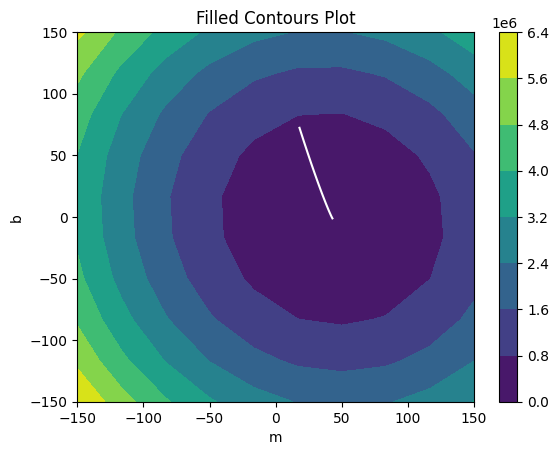

<Figure size 1800x400 with 0 Axes>

In [11]:
fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(xx, yy, zz)
ax.plot(np.array(coef).ravel(),np.array(intercept).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()